## Notebook  to run ilastik on e-shrew data

In [ ]:
""" 
Run the code in this cell to create a new environment to run ilastik
""" 
# conda create -n ilastik-dev  python=2.7
# source activate ilastik-dev 
# conda install -c ilastik ilastik-everything-but-tracking
# pip install ndparse
# pip install mahotas
# conda remove tifffile
# conda install -c ilastik  tifffile=0.4.1
# conda install ipython
# conda install jupyter
# pip install tifffiles
# source deactivate
# source activate ilastik-dev

### 0) Import and define variables

In [1]:
"""                                                                                                 
Separate file to keep segmentation paramters in it. E.g,                                            
stopping_criterion = 0.47                                                                           
vessel_probability_threshold = .68                                                                  
dilation_size = 3                                                                                   
minimum_size = 4000
"""
from segmentation_param import *
import numpy as np
import scipy.io as sio
from PIL import Image
import ndparse as ndp

#segmentation entry point functions
from read_tiff_files import read_tiff_files
from read_tiff_files_subset import read_tiff_files_subset
from classify_pixel import classify_pixel
#from detect_cells import detect_cells
from segment_vessels import segment_vessels


No handlers could be found for logger "ilastik.workflows"


### 1) Set location of input file stack and classifier

In [2]:
# Location of input files (to be classified) + classifier (.ilp file)
tiff_files_location = '/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/'
classifier_file = '/Volumes/Brain2016/eshrew-recons/train_ilastik/test-eshrew-lgtrain.ilp'


### 2) Read subset of tiff stack

In [3]:
# Read subset of tiff stack files - output of tomopy - last arg specifies which slices to return
input_data = read_tiff_files_subset(tiff_files_location,list(np.arange(50,100)))
print("input_data shape", input_data.shape)

#%matplotlib inline
#ndp.plot(input_data[4000:9000,3000:,:], slice=5)


/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04947_center_06424.tif
/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04948_center_06424.tif
/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04949_center_06424.tif
/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04950_center_06424.tif
/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04951_center_06424.tif
/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04952_center_06424.tif
/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04953_center_06424.tif
/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04954_center_06424.tif
/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04955_center_06424.tif
/Volumes/Brain2016/eshrew-recons/test_ilastik/test_ilastik_converted/recon_04956_center_06424.tif
/Volumes/Brain2016/e

### 3) Select which test dataset you want (S, M, L)

In [9]:
# select + uncomment one of the examples below (S,M,L)
# small = 0.045 GVox, medium = 0.78 GVox, large = 5.2 GVox
# ran the medium example on my laptop (2.6GHz) in 45 minutes 
# each 151x151x50 block runs in 10-20 sec

testdata_small = input_data[5400:6400,3900:4800,:]
#testdata_medium = input_data[4000:9000,2000:,:]
#testdata_large = input_data

(5000, 3136, 50)

### 4) Run ilastik on input data

In [10]:
# Compute cell and vessel probability map.
probability_maps = classify_pixel(data_subset, classifier_file, threads=no_of_threads, ram=ram_size) 

INFO ilastik_main: Starting ilastik from "/Users/evadyer/anaconda/envs/ilastik-dev".
Starting ilastik from "/Users/evadyer/anaconda/envs/ilastik-dev".
INFO ilastik_main: Resetting lazyflow thread pool with 8 threads.
INFO ilastik_main: Configuring lazyflow RAM limit to 3.9GiB
INFO lazyflow.utility.memory: Available memory set to 3.9GiB
INFO ilastik.shell.projectManager: Opening Project: /Volumes/Brain2016/eshrew-recons/train_ilastik/test-eshrew-lgtrain.ilp


WARNING dataset.py(76): DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


input_data.shape (5000, 3136, 50)
label_names, label_colors, probability_colors ['Label 1', 'Label 2'] [(255, 0, 0), (0, 255, 0)] [(255, 0, 0), (0, 255, 0)]
INFO ilastik.applets.batchProcessing.batchProcessingApplet: Exporting to in-memory array.
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per pixel is 172.0B * safety factor (2.0)
INFO lazyflow.utility.bigRequestStreamer: determining blockshape assuming available_ram is 2.9GiB, split between 8 threads
INFO lazyflow.utility.bigRequestStreamer: Chose blockshape: (151, 151, 50, 2)
INFO lazyflow.utility.bigRequestStreamer: Estimated RAM usage per block is 374.0MiB
DEBUG lazyflow.operators.classifierOperators: Features took 4.769665 seconds, Prediction took 4.313692 seconds for roi: [0, 0, 0, 0] : [151, 151, 50, 2]
DEBUG lazyflow.operators.classifierOperators: Features took 8.536953 seconds, Prediction took 3.305722 seconds for roi: [0, 151, 0, 0] : [151, 302, 50, 2]
DEBUG lazyflow.operators.classifierOperators: Features t

### 5) Plot and save cell channel (stack of .jpg)

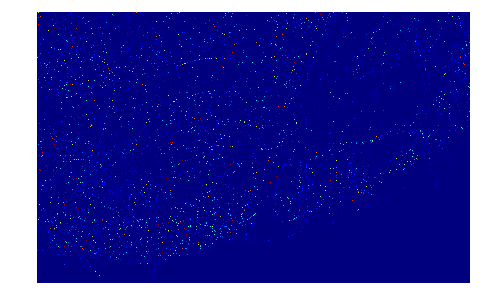

In [14]:
# grab the cell channel from ilastik output
cell_prob_map = probability_maps[:, :, :, 0]
print("cell_prob_map shape", cell_prob_map.shape)

# plot the output of cell segmentation
%matplotlib inline
ndp.plot(cell_prob_map, slice=10, cmap1='jet')

# save as stack of images (change extension to switch format)
import scipy.misc

SavePath = '/Volumes/Brain2016/eshrew-recons/test_ilastik_output/''
for i in range(50):
    filename = SavePath + 'outfile_' + str(i) + '.jpg'
    scipy.misc.imsave(filename, cell_prob_map[:,:,i])